[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 2.307963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

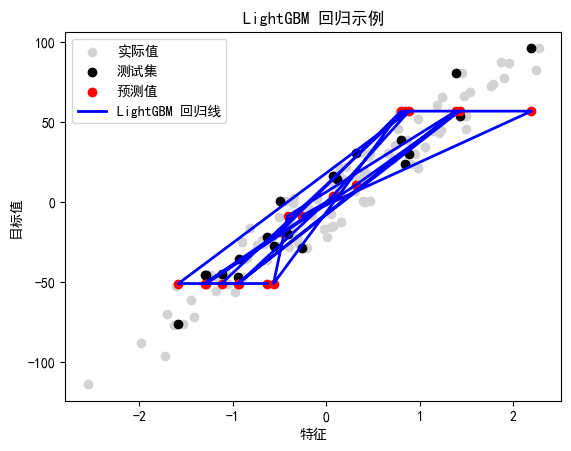

模型的特征重要性: [200]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.datasets import make_regression

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 使负号正常显示

# 生成示例数据
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建 LightGBM 回归模型
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_split_gain=0.0, random_state=0)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 可视化结果
plt.scatter(X, y, color='lightgray', label='实际值')
plt.scatter(X_test, y_test, color='black', label='测试集')
plt.scatter(X_test, y_pred, color='red', label='预测值')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='LightGBM 回归线')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.title('LightGBM 回归示例')
plt.legend()
plt.show()

# 打印模型参数
print(f'模型的特征重要性: {model.feature_importances_}')
